Loading packages

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
import matplotlib.pyplot as plt

# Fluxonium

In [39]:
fluxonium_parameters= {
    'EJ':   10,
    'EC':   1.81,
    'EL':   0.369,
}

flux_array = np.linspace(-0.5, 0.5, 1001)

#Fluxonium definition
fluxonium = sq.Fluxonium(**fluxonium_parameters,flux =0,cutoff=40)

#Obtain energy levels and matrix elements
spectrum_data = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6
)

# Obtain the energy levels.
evals_matrix = spectrum_data.energy_table

#Obtain the transition energies from the state 0, 1 and 2
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

# Erasing 'transition from i to i'
transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)

#Obtain the matrix elements.
matrix_element = spectrum_data.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

# Erasing 'matrix element from i to i'
transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)

Spectral data:   0%|          | 0/1001 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

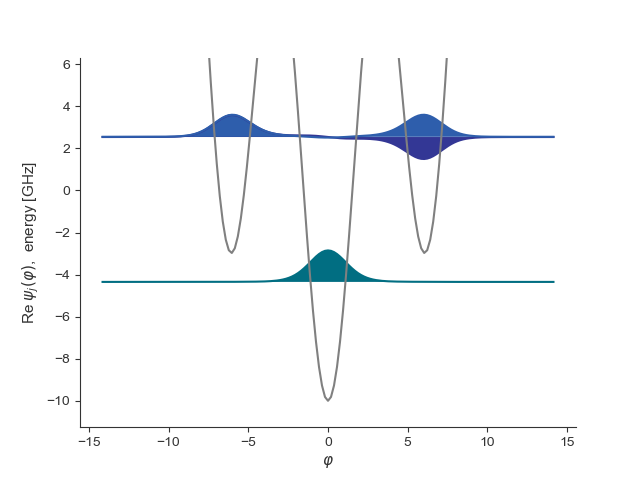

In [41]:
fluxonium.plot_wavefunction(which=[0,1,2])

## Plot energy transitions

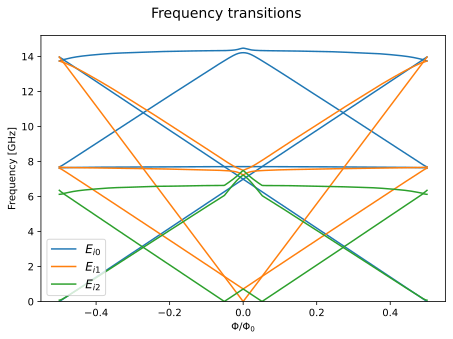

In [13]:
# %matplotlib widget #Uncomment this if you want to have a interactive image.

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency transitions', fontsize = 14)
ax.plot(flux_array,transitions0,color='C0')
ax.plot(flux_array,transitions1,color='C1')
ax.plot(flux_array,transitions2,color='C2')

ax.plot([], [], color='C0', label=r'$E_{i0}$')
ax.plot([], [], color='C1', label=r'$E_{i1}$')
ax.plot([], [], color='C2', label=r'$E_{i2}$')
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()

# Fluxonium + Resonator

In [45]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.3678,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='discretized',
    truncated_dim= 10
)


flux1_array = np.linspace(-0.5,0.5,101)

spectrumData_fluxres = fluxonium_resonator.get_matelements_vs_paramvals(
    operator='θ2_operator',
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

spectra_fluxres = spectrumData_fluxres.energy_table

transitions0 = spectra_fluxres - spectra_fluxres[:,0].reshape(-1,1)
transitions1 = spectra_fluxres - spectra_fluxres[:,1].reshape(-1,1)
transitions2 = spectra_fluxres - spectra_fluxres[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)


matrix_element = spectrumData_fluxres.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)


max0_matrix_elem = np.max(transition0_matrix_element)
max1_matrix_elem = np.max(transition1_matrix_element)
max2_matrix_elem = np.max(transition2_matrix_element)
max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

## Plot energy levels

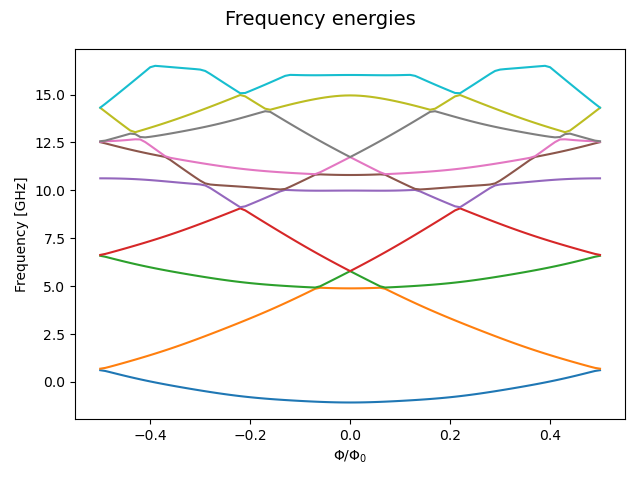

In [46]:
fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

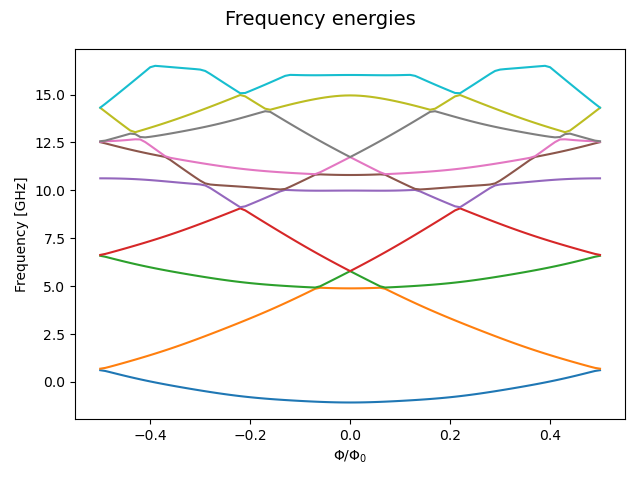

In [ ]:
fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

## Coupling

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

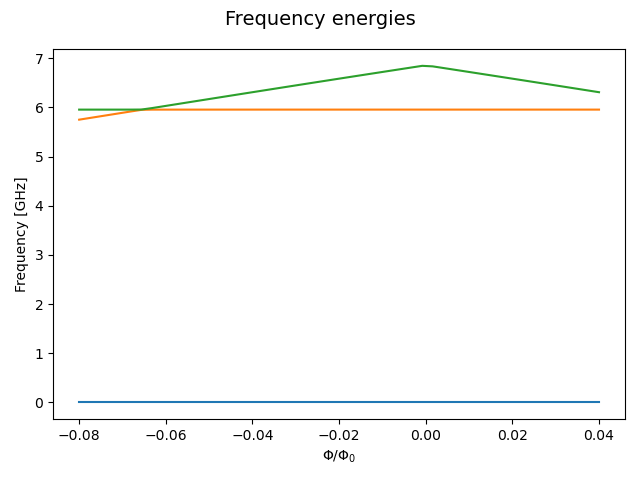

In [52]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.3678,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.140
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

flux1_array = np.linspace(-0.08,0.04,51)

spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=3,
    subtract_ground=True)

spectra_fluxres = spectrumData_fluxres.energy_table


fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

In [53]:
spectra_fluxres.shape

(51, 3)

## Dispersive shift

In [20]:
flux1_array = np.linspace(-0.005,0.005,101)

spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

In [21]:
spectra_fluxres = spectrumData_fluxres.energy_table

Eg0_1 = spectra_fluxres[:,0]

Ee0_1 = spectra_fluxres[:,2]
Ef0_1 = spectra_fluxres[:,3]

Eg1_1 = spectra_fluxres[:,1]
Ee1_1 = spectra_fluxres[:,6]
Ef1_1 = spectra_fluxres[:,7]

Ee0_2 = spectra_fluxres[:,1]
Eg1_2 = spectra_fluxres[:,2]
Ee1_2 = spectra_fluxres[:,5]

dispersive_shift_01_1 = ((Ee1_1 - Ee0_1) - (Eg1_1 - Eg0_1))/2
dispersive_shift_01_2 = ((Ee1_2 - Ee0_2) - (Eg1_2 - Eg0_1))/2
dispersive_shift_02_1 = ((Ef1_1 - Ef0_1) - (Eg1_1 - Eg0_1))/2

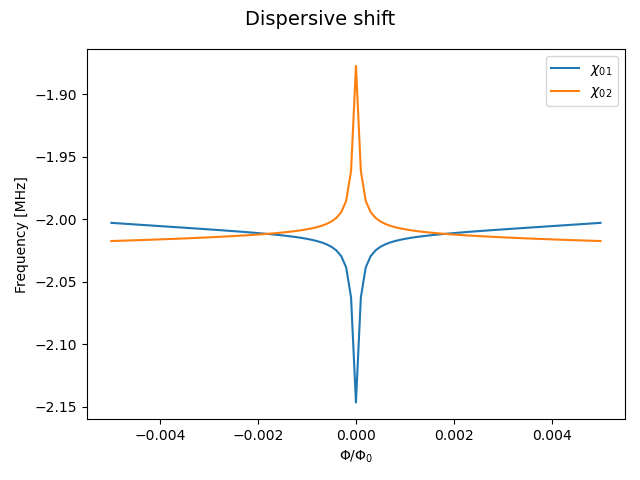

In [23]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)

ax.plot(flux1_array,dispersive_shift_01_1*1e3, label = r'$\chi_{01}$')
# ax.plot(flux1_array,dispersive_shift_01_2*1e3, label = r'$\chi_{01}$')
ax.plot(flux1_array,dispersive_shift_02_1*1e3, label = r'$\chi_{02}$')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

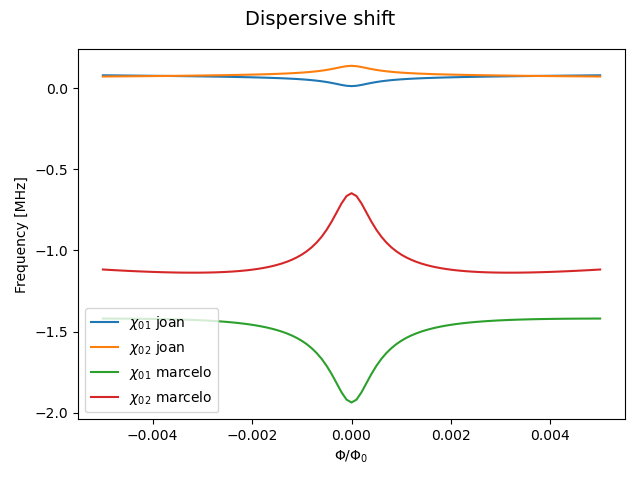

In [ ]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)
ax.plot(flux1_array,dispersive_shift_01_1_joan*1e3, label = r'$\chi_{01}$ joan')
# ax.plot(flux1_array,dispersive_shift_01_2_joan*1e3, label = r'$\chi_{01}$ joan')
ax.plot(flux1_array,dispersive_shift_02_1_joan*1e3, label = r'$\chi_{02}$ joan')

ax.plot(flux1_array,dispersive_shift_01_1_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
# ax.plot(flux1_array,dispersive_shift_01_2_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
ax.plot(flux1_array,dispersive_shift_02_1_marcelo*1e3, label = r'$\chi_{02}$ marcelo')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

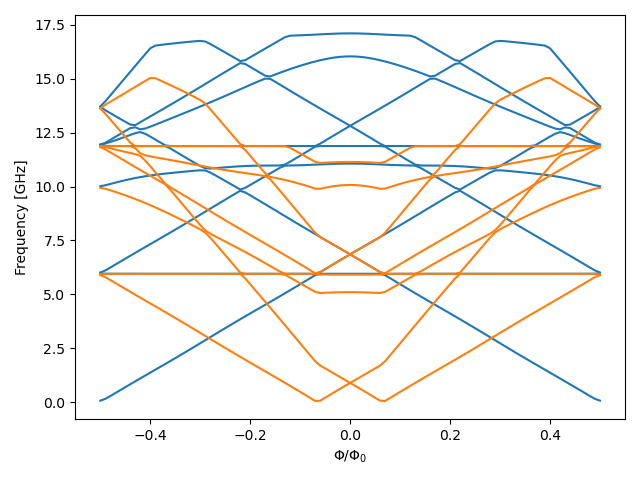

In [12]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,transitions0, color='C0')
ax.plot(flux1_array,transitions1, color='C1')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

# Fluxonium-resonator fitting

In [97]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.368,
    # 'EL':   0.4,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.3
EC_resonator = resonator_frequency**2/8/(1/(1/EL_resonator + 1/EL_shared))

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='discretized',
    truncated_dim= 15
)

In [119]:
from tqdm.notebook import tqdm
from IPython.utils import io
from scipy.optimize import differential_evolution

def fluxres(params) -> sq.Circuit:
    EJ,EC, EL_fluxonium, EL_shared, EC_resonator, EL_resonator = params
    
    circuit_dict = f"""
        branches:
        - ["JJ", 0,1, {EJ}, {EC}]
        - ["L", 1,2, {EL_fluxonium}]
        # Coupling inductance
        - ["L", 2,0, {EL_shared}]
        # JJA resonator
        - ["C", 0,3, {EC_resonator}]
        - ["L", 3,2, {EL_resonator}]
    """
    
    fluxonium_resonator = sq.Circuit(
        input_string=circuit_dict,
        from_file=None,
        ext_basis='discretized',
        truncated_dim= 15
    )
    
    return fluxonium_resonator
    
def fluxres_energylevels(circuit: sq.Circuit, param_vals, evals_count):
    with io.capture_output() as captured:
        spectrumData = circuit.get_spectrum_vs_paramvals(
                param_name='Φ1',
                param_vals=param_vals,
                evals_count=evals_count,
                subtract_ground=False)
    
    return spectrumData.energy_table

def callback(params, convergence):
    # Register the current state of the fit
    progress.append(params)
    # Calculate the current cost
    cost = minimizer(params)
    
    # Print the parameters, cost, and convergence
    print(f'Params: {params}, Cost: {cost}, Convergence: {convergence}')
    # Update the progress bar
    progress_bar.update(len(progress) - progress_bar.n)
    if len(progress) >= 100:
        progress_bar.close()


In [125]:
values_E02 = np.array([
    [0,6.88489],
    [-0.001733,  6.86376],
    [-0.053921, 6.14379],
    [-0.056383, 6.14082],
    ])

def minimizer(params):
    circuit_to_fit = fluxres(params)
    energylevels= fluxres_energylevels(circuit_to_fit, values_E02[:,0], 3)

    transition_E02 = energylevels[:,2]-energylevels[:,0]
    transition_E02_exp = values_E02[:,1]

    cost_function = np.sum((transition_E02-transition_E02_exp)**2)
    return cost_function

params = (10.013, 1.59, 0.41, 3.54, 16.89, 0.30)
bounds = [(9, 11), (1.2,2), (0.3,0.5), (3,4), (14,20), (0.2,0.4)]

progress = []

# Create the progress bar
progress_bar = tqdm(total=100, desc="Iterations")

result = differential_evolution(func=minimizer, bounds=bounds, callback=callback, disp=False, maxiter=100)
# fig,ax = plt.subplots(1,1)
# ax.plot(values_E02[:,0],energylevels[:,2]-energylevels[:,0],'o-')
# plt.show()

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Params: [10.54751929  1.30841482  0.4149374   3.32207585 18.37608069  0.22790507], Cost: 0.0011259547362478855, Convergence: 0.010905050434042243
Params: [10.38568363  1.27663101  0.41226067  3.44415958 16.76043071  0.27361412], Cost: 0.0008953269748198787, Convergence: 0.009575378695241091
Params: [10.38568363  1.27663101  0.41226067  3.44415958 16.76043071  0.27361412], Cost: 0.0008953269748198787, Convergence: 0.008823944269635986
Params: [10.38568363  1.27663101  0.41226067  3.44415958 16.76043071  0.27361412], Cost: 0.0008953269748198787, Convergence: 0.0066869632937775715
Params: [10.38568363  1.27663101  0.41226067  3.44415958 16.76043071  0.27361412], Cost: 0.0008953269748198787, Convergence: 0.005936459887648807
Params: [10.25485486  1.23127479  0.40883904  3.83010805 19.00768952  0.25827054], Cost: 0.000489002658799635, Convergence: 0.004510085279545984
Params: [10.49165404  1.3964094   0.41607323  3.17741976 17.61487736  0.2857842 ], Cost: 0.00046903196942787724, Convergence

KeyboardInterrupt: 

In [ ]:
import sys
sys.path.append('..')
from src.utilities import plot3D
from src.utilities import load_data
filedirectory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//"
data = {}
data['sts_flux_zoom'] = load_data(filedirectory + "FBW10S4_" + str(413199))
data['tts_zero'] = load_data(filedirectory + "FBW10S4_" + str(422231))
data['sts_flux_zoom']['freq'] *= 1e-9
data['tts_zero']['freq'] *= 1e-9

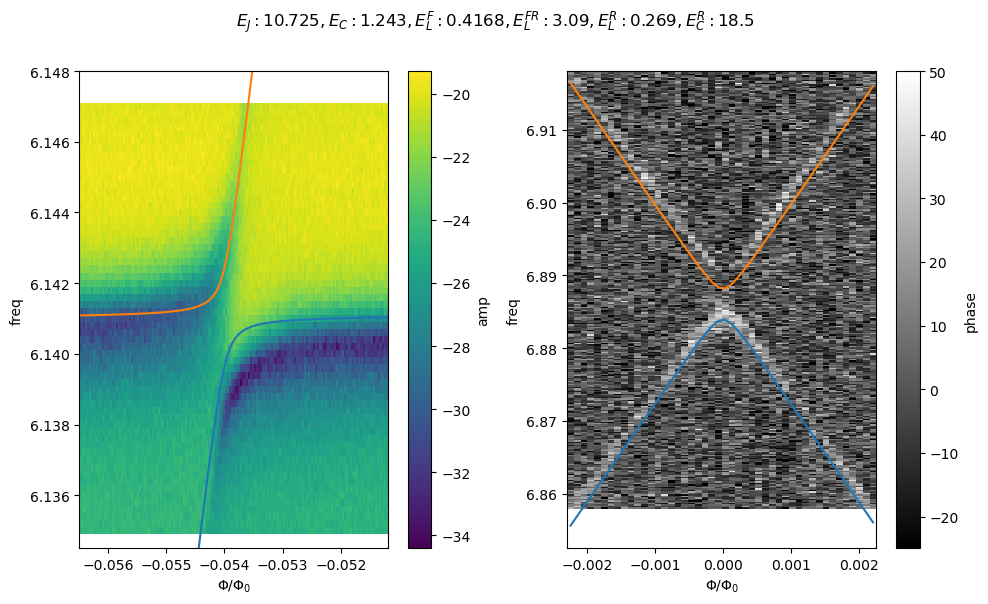

In [208]:
voltage_period = 3.033
zero_flux = 1.5373
data['sts_flux_zoom']['phi'] = (data['sts_flux_zoom']['flux']-zero_flux)/voltage_period
zero_flux = 1.3668
data['tts_zero']['phi'] = (data['tts_zero']['flux']-zero_flux)/voltage_period

fig, ax = plt.subplots(1,2,figsize=(10,6))
plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    fig=fig,
    ax=ax[0],
)

plot3D(
    data_dict=data['tts_zero'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[1],
    flatten_vertical=1,
    fig=fig,
    vmin=-25,
    vmax=50,
    cmap='gray',
)

params_fit = (10.72492309,  1.24324419,  0.41682511,  3.09374287, 18.50734792,  0.26924819)
circuit_fitted = fluxres(params_fit) 
energylevels_fitted_anti = fluxres_energylevels(circuit_fitted, data['sts_flux_zoom']['phi'], 3)
energylevels_fitted_zero = fluxres_energylevels(circuit_fitted, data['tts_zero']['phi'], 4)
ax[0].plot(data['sts_flux_zoom']['phi'],energylevels_fitted_anti[:,1]-energylevels_fitted_anti[:,0],'-')
ax[0].plot(data['sts_flux_zoom']['phi'],energylevels_fitted_anti[:,2]-energylevels_fitted_anti[:,0],'-')
ax[1].plot(data['tts_zero']['phi'],energylevels_fitted_zero[:,2]-energylevels_fitted_zero[:,0],'-')
ax[1].plot(data['tts_zero']['phi'],energylevels_fitted_zero[:,3]-energylevels_fitted_zero[:,0],'-')
ax[0].set_ylim(6.1345,6.148)

fig.suptitle(r'$E_J: 10.725, E_C: 1.243, E_L^F: 0.4168, E_L^{{FR}}: 3.09, E_L^R: 0.269, E_C^R: 18.5$',y=1.0)
ax[0].set_xlabel(r'$\Phi/\Phi_0$')
ax[1].set_xlabel(r'$\Phi/\Phi_0$')
fig.tight_layout()
plt.show()

In [176]:
param_vals = np.linspace(-0.5,0,501)

params_fit = (10.72492309,  1.24324419,  0.41682511,  3.09374287, 18.50734792,  0.26924819)
circuit_fitted = fluxres(params_fit) 
energylevels = fluxres_energylevels(circuit_fitted, param_vals, 15)

In [ ]:
param_vals_pp = np.linspace(-0.5,0.5,501)

params_fit = (10.72492309,  1.24324419,  0.41682511,  3.09374287, 18.50734792,  0.26924819)
circuit_fitted = fluxres(params_fit) 
energylevels_pp = fluxres_energylevels(circuit_fitted, param_vals_pp, 15)

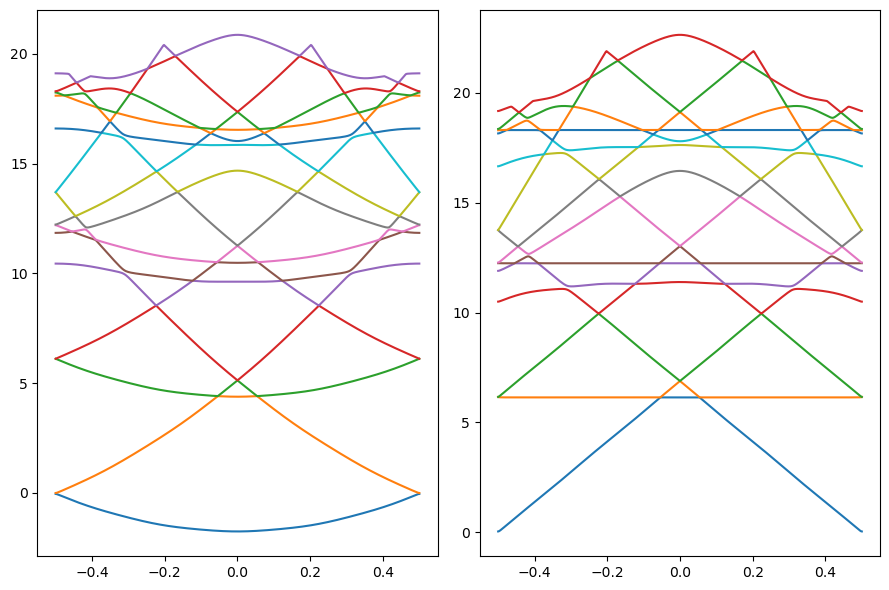

In [219]:
fig,ax = plt.subplots(1,2,figsize=(9,6))
ax[0].plot(param_vals_pp,energylevels_pp)
ax[1].plot(param_vals_pp,np.delete(energylevels_pp-energylevels_pp[:,0].reshape(-1,1),0,axis=1))
fig.tight_layout()
plt.show()

In [210]:
datasets = {
    'sts_power':        409931,
    'res_fluq':         416866,
    'two_res':          200907,
    'sts_flux':         411703,
    'sts_flux_zoom':    413199,
    'flux_drifting':    421220,
    'sts_power_change': 418329,   
    'sts_power_change2':421479,
    'tts_left':         422696,
    'tts_upper':        422958,
    'tts_lower':        424530,
    'tts_zero':         422231,
    'tts_double':       401277,
    'rabi':             406035,
    't1':               405783,    
    'ramsey':           421172,
}

In [211]:
data = {}
for key, datanumber in tqdm(datasets.items()):
    data[key] = load_data(filedirectory + "FBW10S4_" +str(datanumber))
    if 'freq' in data[key]:
        data[key]['freq'] *= 1e-9

  0%|          | 0/16 [00:00<?, ?it/s]

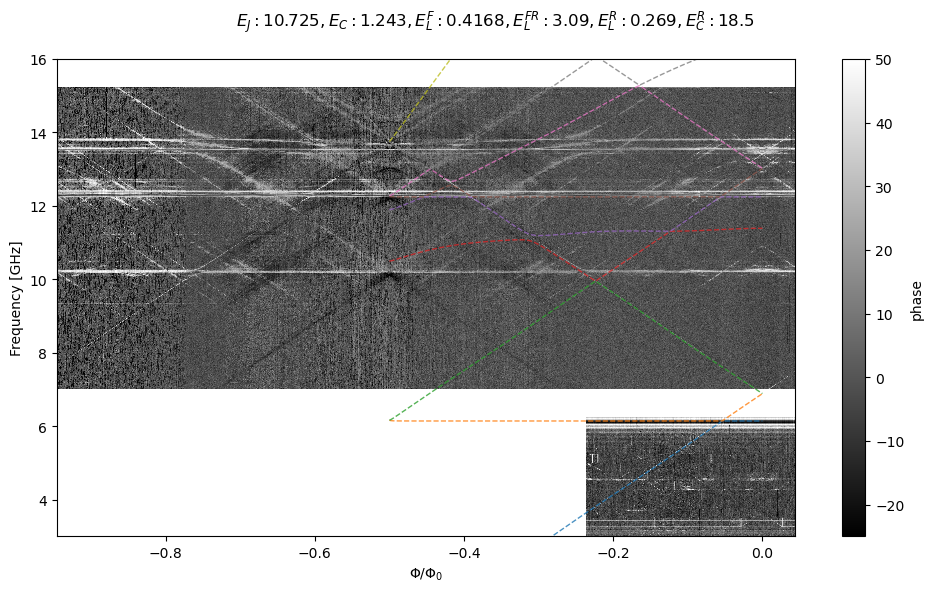

In [221]:
from src.utilities import plot3Ds

voltage_period = 3.033
zero_flux = 1.3668

tts_dict = {key: data[key] for key in ['tts_upper','tts_lower','tts_left'] if key in data}

for key in ['tts_upper','tts_lower','tts_left']:
    tts_dict[key]['phi'] = (tts_dict[key]['flux']-zero_flux)/voltage_period
data['tts_zero']['phi'] = (data['tts_zero']['flux']-zero_flux)/voltage_period

fig,ax = plt.subplots(1,1,figsize = (10,6))
plot3Ds(
    data_dicts=tts_dict,
    x_key='phi',
    y_key='freq',
    z_key='phase',
    flatten_vertical=1,
    flatten_horizontal=0,
    vmin=-25,
    vmax=50,
    cmap='gray',
    fig=fig,
    ax=ax
)
transitions0 = np.delete(energylevels-energylevels[:,0].reshape(-1,1),0,axis=1)
transitions1 = np.delete(energylevels-energylevels[:,1].reshape(-1,1),[0,1],axis=1)
transitions2 = np.delete(energylevels-energylevels[:,2].reshape(-1,1),[0,1,2],axis=1)
transitions3 = np.delete(energylevels-energylevels[:,3].reshape(-1,1),[0,1,2,3],axis=1)
transitions4 = np.delete(energylevels-energylevels[:,4].reshape(-1,1),[0,1,2,3,4],axis=1)
transitions5 = np.delete(energylevels-energylevels[:,5].reshape(-1,1),[0,1,2,3,4,5],axis=1)
transitions6 = np.delete(energylevels-energylevels[:,5].reshape(-1,1),[0,1,2,3,4,5,6],axis=1)

ax.plot(param_vals,transitions0,'--', alpha=0.8,linewidth=1, label = 'pp')
# ax.plot(param_vals,transitions1,'--', color='C1',alpha=0.8,linewidth=1)
# ax.plot(param_vals,transitions2,'--', color='C2',alpha=0.8,linewidth=1)
# ax.plot(param_vals,transitions3,'--', color='C3',alpha=0.8,linewidth=1)
# ax.plot(param_vals,transitions4,'--', color='C4',alpha=0.8,linewidth=1)
# ax.plot(param_vals,transitions5,'--', color='C5',alpha=0.8,linewidth=1)
# ax.plot(param_vals,transitions6,'--', color='C6',alpha=0.8,linewidth=1)
# ax.plot(param_vals,energylevels-energylevels[:,2].reshape(-1,1),'--', color='C2',alpha=0.8,linewidth=1)
# ax.plot(param_vals,energylevels-energylevels[:,3].reshape(-1,1),'--', color='C3',alpha=0.8,linewidth=1)
fig.suptitle(r'$E_J: 10.725, E_C: 1.243, E_L^F: 0.4168, E_L^{{FR}}: 3.09, E_L^R: 0.269, E_C^R: 18.5$')
ax.set_ylim(bottom=3,top=16)
# labels = [rf'$|g0\rangle \rightarrow |g0\rangle$']
# ax.legend(labels,fontsize=12)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel('Frequency [GHz]')
fig.tight_layout()
plt.show()

In [234]:
153*3.24 - 607.7

-111.98000000000002

In [244]:
41.17/5.7

7.22280701754386

In [241]:
phi0 = const.h/2/const.e/(2*np.pi)
phi0**2/const.h/3.97

41.174184586090966

In [237]:
3.218760*0.57/0.1

18.346931999999995

In [238]:
phi0**2/18.346932/const.h

8.90947395492506

In [213]:
param_vals.shape

(501,)

In [214]:
transitions0.shape

(501, 14)

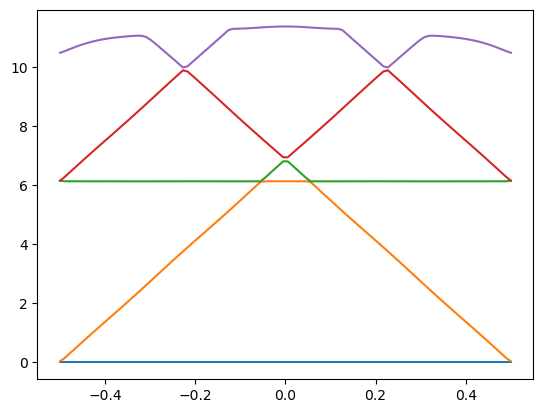

In [133]:
params = (10.013, 1.59, 0.41, 3.54, 16.89, 0.30)
fig,ax = plt.subplots(1,1)
params_fit = (10.72492309,  1.24324419,  0.41682511,  3.09374287, 18.50734792,  0.26924819)
circuit_fitted = fluxres(params_fit) 
param_vals = np.linspace(-0.5,0.5,100)
energylevels_fitted = fluxres_energylevels(circuit_fitted, param_vals, 5)
ax.plot(param_vals,energylevels_fitted-energylevels_fitted[:,0].reshape(-1,1),'-')
plt.show()

In [ ]:



def minimizer(params):
    circuit_to_fit = fluxres(params)
    energy_levels = fluxres_energylevels(circuit_to_fit, param_vals, evals_count)
    
    

fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.368,
    # 'EL':   0.4,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.3
EC_resonator = resonator_frequency**2/8/(1/(1/EL_resonator + 1/EL_shared))

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='discretized',
    truncated_dim= 15
)

In [96]:
print(EJ,EC, EL_fluxonium, EL_shared, EC_resonator, EL_resonator)
bounds = [(9, 11), (1.2,2), (0.3,0.5), (3,4), (14,20), (0.2,0.4)]

EJ,EC, EL_fluxonium, EL_shared, EC_resonator, EL_resonator = params

10.013 1.588 0.4131666666666666 3.5414285714285714 16.886345300524404 0.2986746987951807


In [98]:
param_vals_anticrossing = np.linspace(-0.07,-0.04,31)

spectrumData_fluxres_anticrossing = fluxonium_resonator.get_spectrum_vs_paramvals(
            param_name='Φ1',
            param_vals=param_vals_anticrossing,
            evals_count=3,
            subtract_ground=True)

spectra_fluxres_anticrossing = spectrumData_fluxres_anticrossing.energy_table

param_vals_qubit = np.linspace(-0.002,0.002,41)

spectrumData_fluxres_qubit = fluxonium_resonator.get_spectrum_vs_paramvals(
            param_name='Φ1',
            param_vals=param_vals_qubit,
            evals_count=4,
            subtract_ground=True)

spectra_fluxres_qubit = spectrumData_fluxres_qubit.energy_table

Spectral data:   0%|          | 0/31 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/41 [00:00<?, ?it/s]

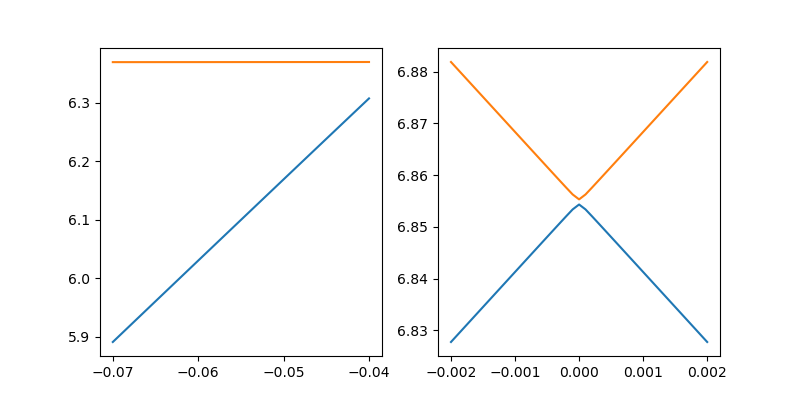

In [101]:
%matplotlib widget
fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(param_vals_anticrossing, spectra_fluxres_anticrossing[:,1:])
ax[1].plot(param_vals_qubit, spectra_fluxres_qubit[:,2:])
# ax[0].set_ylim([6.16,6.17])
plt.show()

In [66]:
import sys
sys.path.append('..')
import pandas as pd
from tqdm.notebook import tqdm
from IPython.utils import io
from scipy.optimize import differential_evolution

In [74]:
file_path = '../data/data_fitting/E01.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',', header=None, names=['phi', 'E01'])

def minimizer_fluxres(params):
    Ej,Ec,El,EC_resonator = params
    Ej = Ej*10; El = El/10; EC_resonator = EC_resonator*10
    flux_res_dict = f"""
    branches:
    - ["JJ", 0,1, {Ej}, {Ec}]
    - ["L", 1,2, {El*134/(134-14)}]
    # Coupling inductance
    - ["L", 2,0, {El*134/14}]
    # JJA resonator
    - ["C", 0,3, {El*134/(152+14)}]
    - ["L", 3,2, {EC_resonator}]
    """

    fluxonium_resonator = sq.Circuit(
        input_string=flux_res_dict,
        from_file=None,
        ext_basis='discretized',
        truncated_dim= 10
    )
    with io.capture_output() as captured:
        spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
            param_name='Φ1',
            param_vals=df['phi'].values,
            evals_count=3)

    spectra_fluxres = spectrumData_fluxres.energy_table
    cost = np.sqrt(np.sum((spectra_fluxres[:,2] - df['E01'].values)**2))/len(df['phi'].values)
    
    print(cost)

    return cost


def callback(params, convergence):
    progress = []

    # Create the progress bar
    progress_bar = tqdm(total=100, desc="Iterations")
    # Register the current state of the fit
    progress.append(params)
    # Calculate the current cost
    cost = minimizer_fluxres(params)
    
    # Print the parameters, cost, and convergence
    print(f'Params: {params}, Cost: {cost}, Convergence: {convergence}')
    # Update the progress bar
    progress_bar.update(len(progress) - progress_bar.n)
    if len(progress) >= 100:
        progress_bar.close()

bounds = [(0.8, 1.1), (1.2, 2), (2,4), (1,2)]

result = differential_evolution(func=minimizer_fluxres, bounds=bounds, callback=callback, disp=False, maxiter=100)

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

0.808222074715605
0.550435802024025
0.9039789382861504
1.1706418261373173
1.7679717576705842
1.2890695805498982
1.2969322633795304
0.7911835259939008
1.090712095208215
0.6023355506701064
1.2707251608484338
1.9197701340116857
0.6910608187453716
0.7961672087556456
1.7335131599641789
1.4848478385725983
0.9798067106910369
1.0841113506813143
0.8166211641268003
1.5950482187290607
1.0960447162249924
1.1984677872440717
1.4940651302952648
1.3069907974545945
0.8869676460014233
1.0086685852647141
0.7944523820167956
1.291429029082356


KeyboardInterrupt: 